In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

sns.set_style('whitegrid')

In [197]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [199]:
# Checking target feature
data.income.value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [200]:
# Transforming target feature into boolean
mapping = {'<=50K':False,'>50K':True}
data['high-income'] = data['income'].replace(mapping).astype(bool)
data['high-income'].value_counts()

/var/folders/5y/xktw_n857vb915jnv6mlqv6c0000gn/T/ipykernel_50120/4171671892.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['high-income'] = data['income'].replace(mapping).astype(bool)


high-income
False    37155
True     11687
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of age')

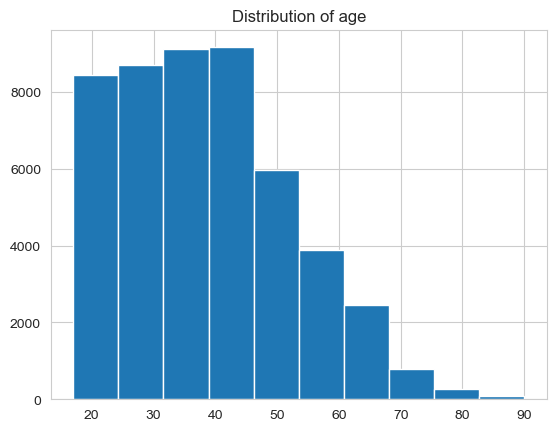

In [201]:
# Checking age distribution
data.age.hist()
plt.title('Distribution of age')

<Axes: xlabel='high-income', ylabel='age'>

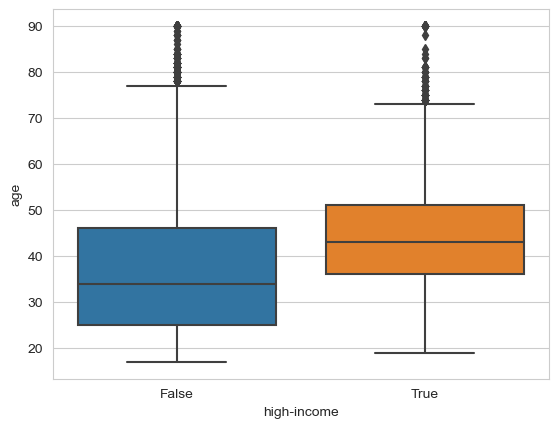

In [202]:
# Does income depend on age?
sns.boxplot(x='high-income',y='age',data=data)

Text(0, 0.5, 'Share of ppl with high income')

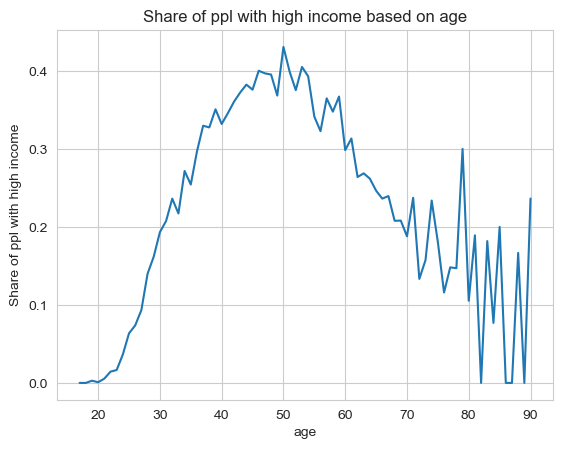

In [203]:
data.groupby('age')['high-income'].mean().plot(kind='line')
plt.title('Share of ppl with high income based on age')
plt.ylabel('Share of ppl with high income')

In [204]:
# Grouping into age groups
bins=[0,18,35,60,100]
data['age-group'] = pd.cut(data['age'],bins=bins,labels=['child','young adult','adult','senior'],right=False).astype('str')
data['age-group'].value_counts()

age-group
adult          23778
young adult    20414
senior          4055
child            595
Name: count, dtype: int64

/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nataliiashcheglova/anaconda3/lib/py

<Axes: xlabel='age', ylabel='Density'>

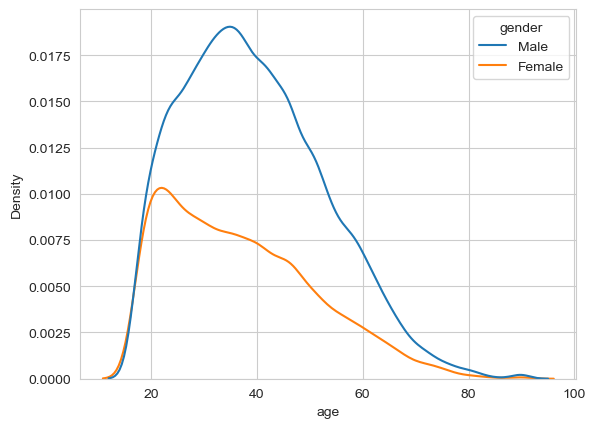

In [205]:
# Checking if age distribution is different for male vs female
sns.kdeplot(data=data, x='age', hue='gender')

In [206]:
#Checking and transforming workplace feature
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [207]:
data.workclass = data.workclass.str.replace('?','Unknown')
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [208]:
# Checking and transforming education features
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [209]:
mapping = {'HS-grad':False,
           'Some-college':True,
           'Bachelors':True,
           'Masters':True,
           'Assoc-acdm':True,
           '11th':False,
           'Assoc-voc':True,
           '10th':False,
           '7th-8th':False,
           'Prof-school':True,
           '9th':False,
           '12th':False,
           'Doctorate':True,
           '5th-6th':False,
           '1st-4th':False, 
           'Preschool':False}
data['higher-education'] = data['education'].replace(mapping).astype(bool)

data['higher-education'].value_counts()

/var/folders/5y/xktw_n857vb915jnv6mlqv6c0000gn/T/ipykernel_50120/3241270900.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['higher-education'] = data['education'].replace(mapping).astype(bool)


higher-education
True     26650
False    22192
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of educational level')

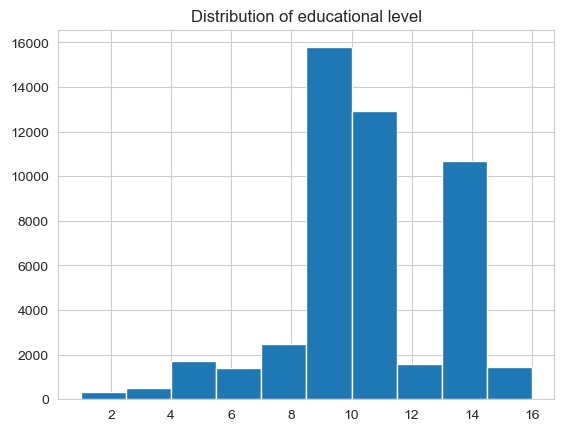

In [210]:
# What's the distribution of education levels?
data['educational-num'].hist()
plt.title('Distribution of educational level')

In [211]:
data.groupby('education')['educational-num'].value_counts()

education     educational-num
10th          6                   1389
11th          7                   1812
12th          8                    657
1st-4th       2                    247
5th-6th       3                    509
7th-8th       4                    955
9th           5                    756
Assoc-acdm    12                  1601
Assoc-voc     11                  2061
Bachelors     13                  8025
Doctorate     16                   594
HS-grad       9                  15784
Masters       14                  2657
Preschool     1                     83
Prof-school   15                   834
Some-college  10                 10878
Name: count, dtype: int64

In [212]:
data.groupby(['higher-education'])['educational-num'].value_counts()

higher-education  educational-num
False             9                  15784
                  7                   1812
                  6                   1389
                  4                    955
                  5                    756
                  8                    657
                  3                    509
                  2                    247
                  1                     83
True              10                 10878
                  13                  8025
                  14                  2657
                  11                  2061
                  12                  1601
                  15                   834
                  16                   594
Name: count, dtype: int64

Text(0, 0.5, 'Share of ppl with high income')

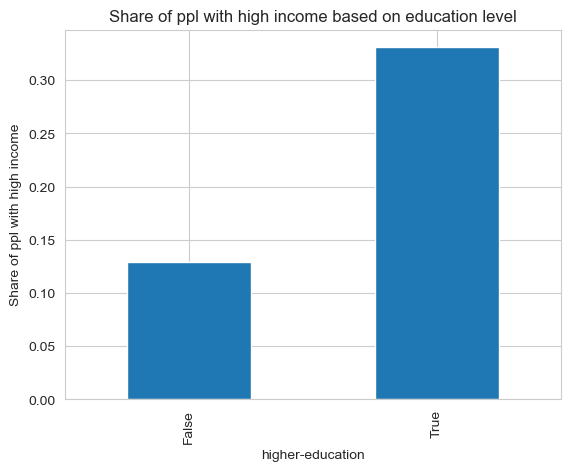

In [213]:
# Is income different for ppl with higher education vs no higher education
data.groupby('higher-education')['high-income'].mean().plot(kind='bar')
plt.title('Share of ppl with high income based on education level')
plt.ylabel('Share of ppl with high income')

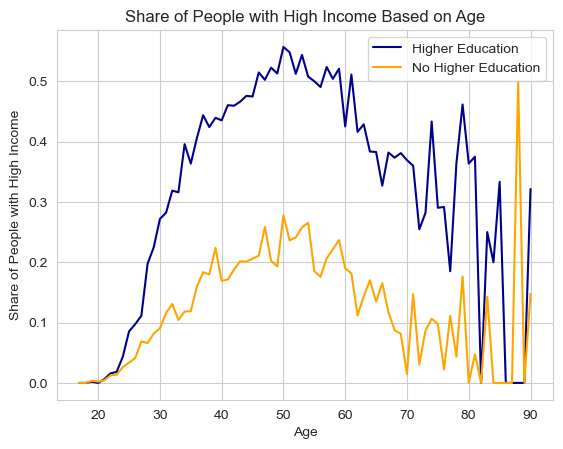

In [216]:
# Is income vs age trend different for different level of education?
higher_ed = data[data['higher-education'] == True]
non_higher_ed = data[data['higher-education'] == False]

higher_ed_mean = higher_ed.groupby('age')['high-income'].mean()
non_higher_ed_mean = non_higher_ed.groupby('age')['high-income'].mean()

plt.plot(higher_ed_mean, label='Higher Education', color='darkblue')
plt.plot(non_higher_ed_mean, label='No Higher Education', color='orange')

plt.title('Share of People with High Income Based on Age')
plt.ylabel('Share of People with High Income')
plt.xlabel('Age')
plt.legend()

plt.show()

Text(0.5, 0, 'Level of Education')

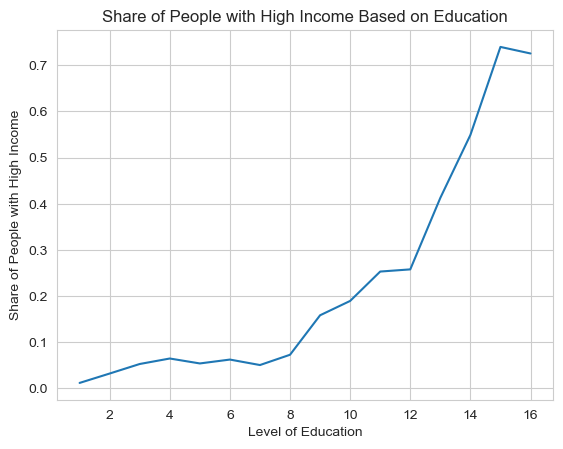

In [215]:
# Does income keep increasing as level of education increases
data.groupby('educational-num')['high-income'].mean().plot()

plt.title('Share of People with High Income Based on Education')
plt.ylabel('Share of People with High Income')
plt.xlabel('Level of Education')

In [217]:
#Checking and transforming marital status
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [218]:
mapping = {'Married-civ-spouse':'married',
           'Never-married':'single',
           'Divorced':'single',
           'Separated':'single',
           'Widowed':'single',
           'Married-spouse-absent':'single',
           'Married-AF-spouse':'married'}
data['relationship-status'] = data['marital-status'].replace(mapping)

data['relationship-status'].value_counts()

relationship-status
single     26426
married    22416
Name: count, dtype: int64

Text(0, 0.5, 'Share of ppl with high income')

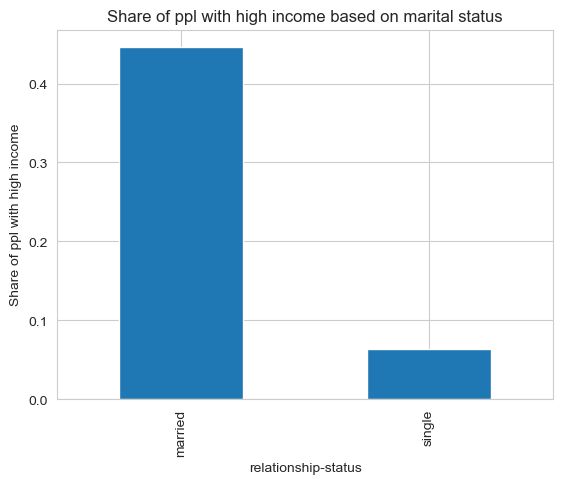

In [219]:
# Is income different for different marital status?
data.groupby('relationship-status')['high-income'].mean().plot(kind='bar')
plt.title('Share of ppl with high income based on marital status')
plt.ylabel('Share of ppl with high income')

Text(0, 0.5, 'Share of ppl with high income')

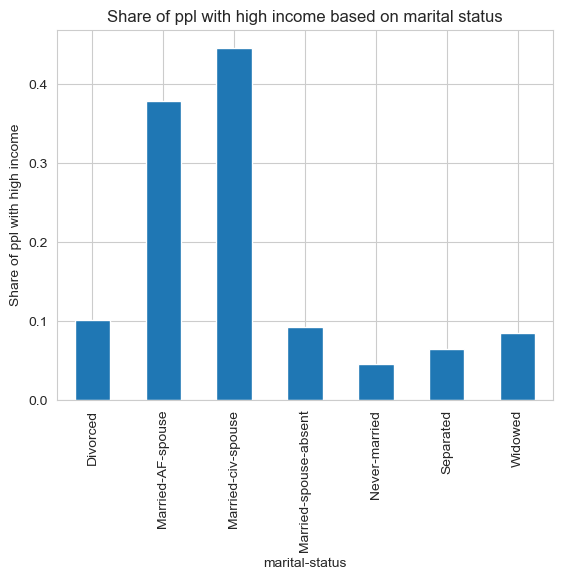

In [220]:
# Diving deeper into marital status
data.groupby('marital-status')['high-income'].mean().plot(kind='bar')
plt.title('Share of ppl with high income based on marital status')
plt.ylabel('Share of ppl with high income')

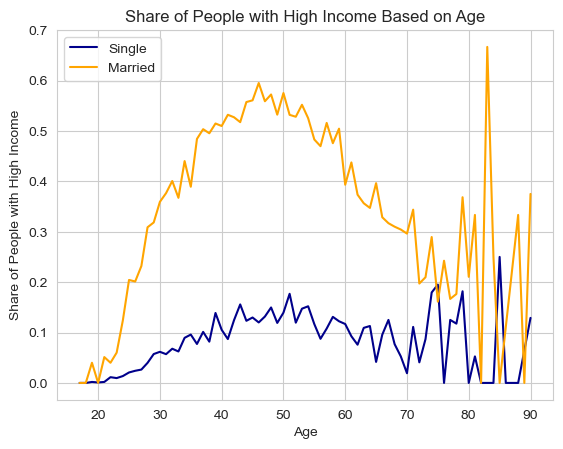

In [221]:
# Is age vs income trend different for different marital statuses?
single = data[data['relationship-status'] == 'single']
married = data[data['relationship-status'] == 'married']

single_mean = single.groupby('age')['high-income'].mean()
married_mean = married.groupby('age')['high-income'].mean()

plt.plot(single_mean, label='Single', color='darkblue')
plt.plot(married_mean, label='Married', color='orange')

plt.title('Share of People with High Income Based on Age')
plt.ylabel('Share of People with High Income')
plt.xlabel('Age')
plt.legend()

plt.show()

In [222]:
#Checking and transforming occupation feature
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [223]:
data.occupation = data.occupation.str.replace('?','Unknown')
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [224]:
# Checking relationship feature
data.relationship.value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

Text(0, 0.5, 'Share of ppl with high income')

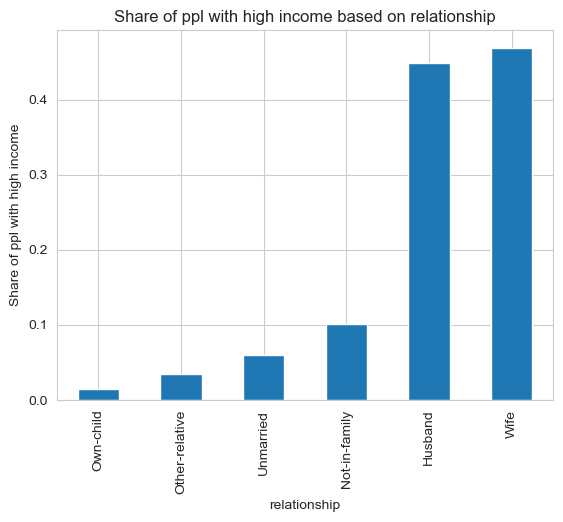

In [225]:
# Is income different for different relationship statuses?
data.groupby('relationship')['high-income'].mean().sort_values().plot(kind='bar')
plt.title('Share of ppl with high income based on relationship')
plt.ylabel('Share of ppl with high income')

In [226]:
# Checking race feature
data.race.value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

Text(0, 0.5, 'Share of ppl with high income')

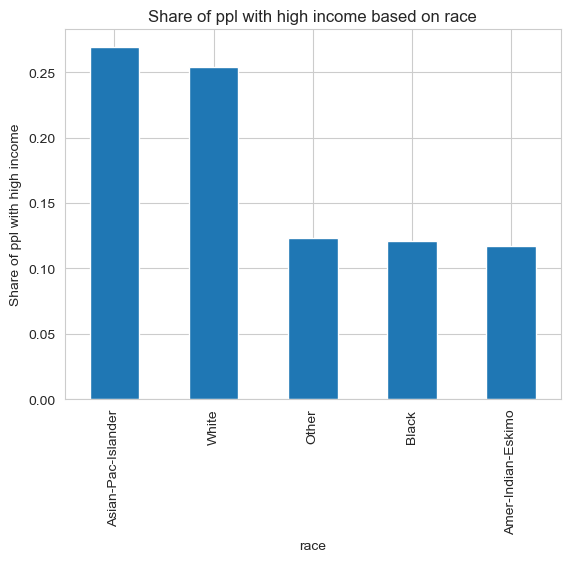

In [227]:
# Is income different for different races?
data.groupby('race')['high-income'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Share of ppl with high income based on race')
plt.ylabel('Share of ppl with high income')

In [228]:
# Checking and transforming gender feature
data.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [229]:
mapping = {'Female':False,
           'Male':True}
data['gender_male'] = data['gender'].replace(mapping).astype(bool)

data['gender_male'].value_counts()

/var/folders/5y/xktw_n857vb915jnv6mlqv6c0000gn/T/ipykernel_50120/2088669930.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender_male'] = data['gender'].replace(mapping).astype(bool)


gender_male
True     32650
False    16192
Name: count, dtype: int64

Text(0, 0.5, 'Share of ppl with high income')

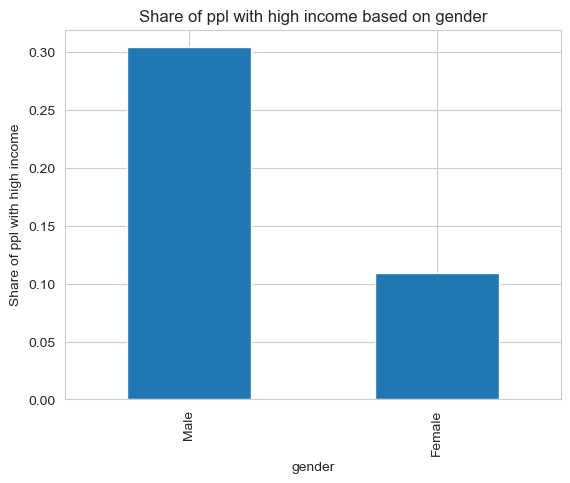

In [230]:
# Is income different for male vs female?
data.groupby('gender')['high-income'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Share of ppl with high income based on gender')
plt.ylabel('Share of ppl with high income')

/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nataliiashcheglova/anaconda3/lib/py

Text(0.5, 1.0, 'Distribution of educational level')

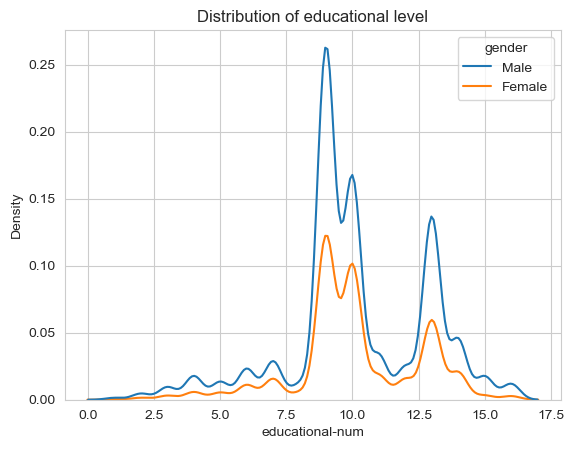

In [231]:
# Is the distribution of higher education different for male vs female?
sns.kdeplot(data=data, x='educational-num', hue='gender')
plt.title('Distribution of educational level')

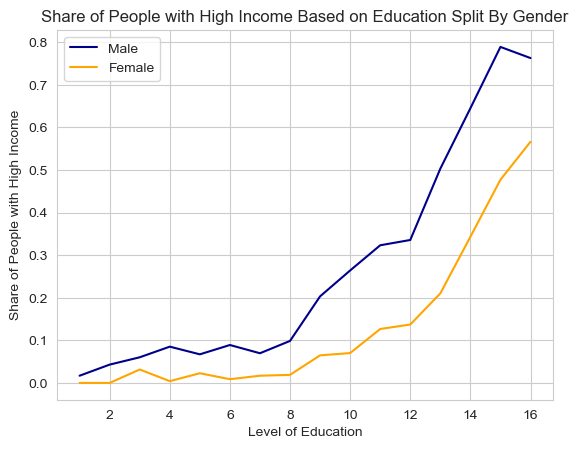

In [232]:
# Is income vs education trend different for male vs female?
male = data[data['gender'] == 'Male']
female = data[data['gender'] == 'Female']

male_mean = male.groupby('educational-num')['high-income'].mean()
female_mean = female.groupby('educational-num')['high-income'].mean()

plt.plot(male_mean, label='Male', color='darkblue')
plt.plot(female_mean, label='Female', color='orange')

plt.title('Share of People with High Income Based on Education Split By Gender')
plt.ylabel('Share of People with High Income')
plt.xlabel('Level of Education')
plt.legend()

plt.show()

In [234]:
data.groupby('gender')[['age-group','relationship-status']].value_counts()

gender  age-group    relationship-status
Female  young adult  single                  6767
        adult        single                  5491
                     married                 1437
        senior       single                  1135
        young adult  married                  926
        child        single                   294
        senior       married                  141
        child        married                    1
Male    adult        married                12678
        young adult  single                  7778
                     married                 4943
        adult        single                  4172
        senior       married                 2289
                     single                   490
        child        single                   299
                     married                    1
Name: count, dtype: int64

/var/folders/5y/xktw_n857vb915jnv6mlqv6c0000gn/T/ipykernel_50120/625661106.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(
/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'young adult - single'),
  Text(1, 0, 'adult - married'),
  Text(2, 0, 'young adult - married'),
  Text(3, 0, 'senior - married'),
  Text(4, 0, 'adult - single'),
  Text(5, 0, 'senior - single'),
  Text(6, 0, 'child - single'),
  Text(7, 0, 'child - married')])

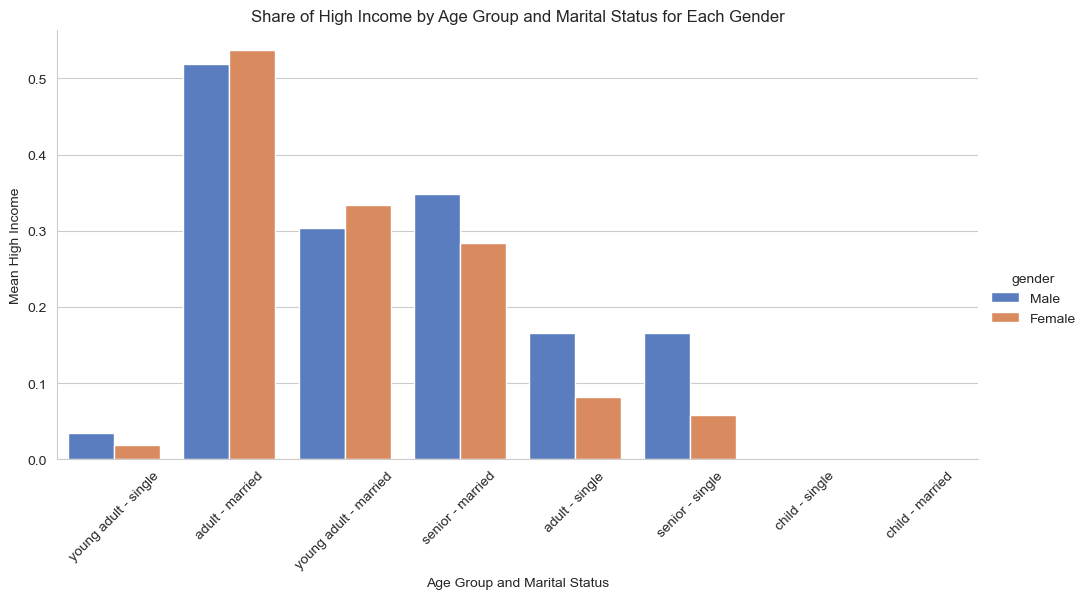

In [235]:
#Comparing side-by-side income for male vs female for different age and marital status groups
data['age_status_group'] = data['age-group'] + ' - ' + data['relationship-status']

sns.catplot(
    x='age_status_group', 
    y='high-income', 
    hue='gender', 
    data=data, 
    kind='bar', 
    estimator=np.mean, 
    ci=None, 
    palette='muted',
    height=5, 
    aspect=2
)

plt.title('Share of High Income by Age Group and Marital Status for Each Gender')
plt.ylabel('Mean High Income')
plt.xlabel('Age Group and Marital Status')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of hours per week')

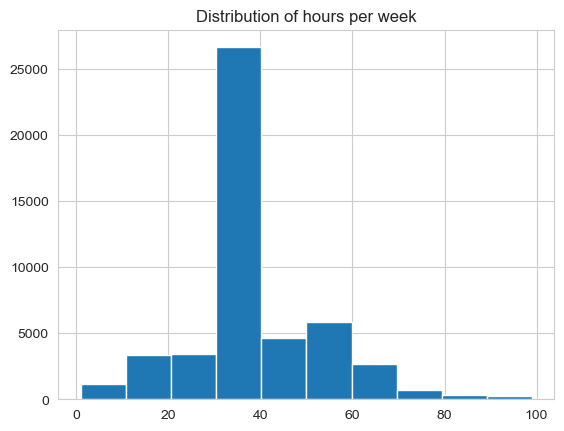

In [236]:
# What's the distribution of hours per week?
data['hours-per-week'].hist()
plt.title('Distribution of hours per week')

/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nataliiashcheglova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nataliiashcheglova/anaconda3/lib/py

Text(0.5, 1.0, 'Distribution of hours per week')

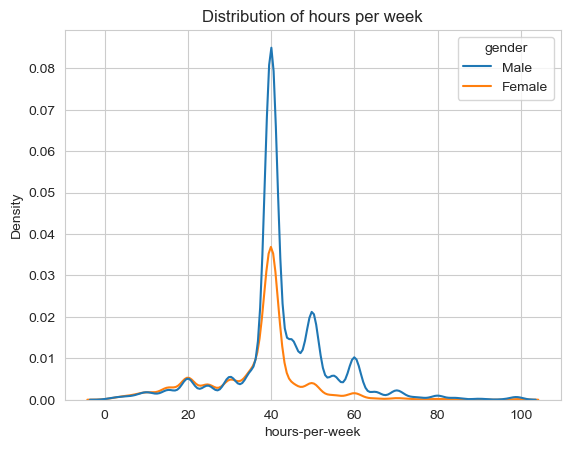

In [237]:
# What's the distribution of hours per week between genders?
sns.kdeplot(data=data, x='hours-per-week', hue='gender')
plt.title('Distribution of hours per week')

Text(0, 0.5, 'Share of ppl with high income')

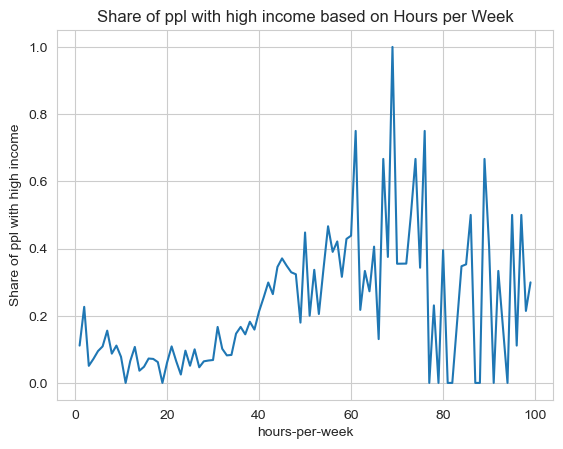

In [238]:
# Does income increase with hours per week?
data.groupby('hours-per-week')['high-income'].mean().plot(kind='line')
plt.title('Share of ppl with high income based on Hours per Week')
plt.ylabel('Share of ppl with high income')

In [239]:
# Checking and transforming native-country feature
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [240]:
data['native-country'] = data['native-country'].str.replace('?','Unknown')
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [241]:
data['country_US'] = data['native-country'].isin(['United-States','Outlying-US(Guam-USVI-etc)'])
data['country_US'].value_counts()

country_US
True     43855
False     4987
Name: count, dtype: int64

In [242]:
# Checking numerical features
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

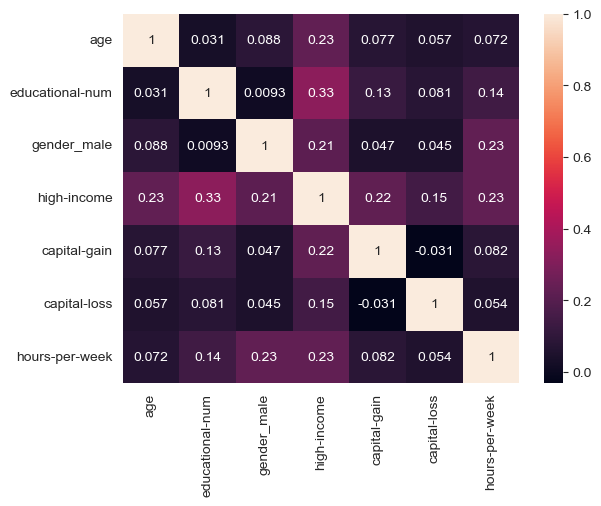

In [253]:
#Checking relationships between features
num_data = data[['age','educational-num','gender_male','high-income','capital-gain','capital-loss','hours-per-week']]
sns.heatmap(num_data.corr(),annot=True)

In [ ]:
# Encoding categorical features to use it in a model
categorical_vars = ['workclass','occupation','race','gender','relationship-status']
data_encoded = pd.get_dummies(data, columns = categorical_vars, drop_first=True)
print('The data have ', data_encoded.shape[0], ' rows and ', data_encoded.shape[1], ' columns\n')

In [245]:
data_encoded.head()

,age,fnlwgt,education,educational-num,marital-status,relationship,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,relationship-status_single
0,25,226802,11th,7,Never-married,Own-child,0,0,40,United-States,...,False,False,False,False,False,True,False,False,True,True
1,38,89814,HS-grad,9,Married-civ-spouse,Husband,0,0,50,United-States,...,False,False,False,False,False,False,False,True,True,False
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Husband,0,0,40,United-States,...,False,False,False,False,False,False,False,True,True,False
3,44,160323,Some-college,10,Married-civ-spouse,Husband,7688,0,40,United-States,...,False,False,False,False,False,True,False,False,True,False
4,18,103497,Some-college,10,Never-married,Own-child,0,0,30,United-States,...,False,False,False,True,False,False,False,True,False,True


In [254]:
columns_to_drop=['fnlwgt','education','marital-status','age-group','age_status_group','relationship','native-country','capital-gain','capital-loss','income','high-income']


In [255]:
# Creating a model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

y = data_encoded['high-income']
X = data_encoded.drop(columns=columns_to_drop) 

model = RandomForestClassifier()
cv_model = cross_validate(model, X, y, cv=5)
rf_cv_scores = cv_model['test_score']
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.8145449796104931, 0.0030546112548903827)

In [256]:
# Fitting a model and checking the importance of features
rf_model=model.fit(X,y)
importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: age, Importance: 0.3264
Feature: educational-num, Importance: 0.1230
Feature: hours-per-week, Importance: 0.1536
Feature: higher-education, Importance: 0.0299
Feature: gender_male, Importance: 0.0179
Feature: country_US, Importance: 0.0131
Feature: workclass_Local-gov, Importance: 0.0070
Feature: workclass_Never-worked, Importance: 0.0000
Feature: workclass_Private, Importance: 0.0127
Feature: workclass_Self-emp-inc, Importance: 0.0084
Feature: workclass_Self-emp-not-inc, Importance: 0.0102
Feature: workclass_State-gov, Importance: 0.0059
Feature: workclass_Unknown, Importance: 0.0023
Feature: workclass_Without-pay, Importance: 0.0002
Feature: occupation_Armed-Forces, Importance: 0.0001
Feature: occupation_Craft-repair, Importance: 0.0080
Feature: occupation_Exec-managerial, Importance: 0.0220
Feature: occupation_Farming-fishing, Importance: 0.0056
Feature: occupation_Handlers-cleaners, Importance: 0.0046
Feature: occupation_Machine-op-inspct, Importance: 0.0050
Feature: occup

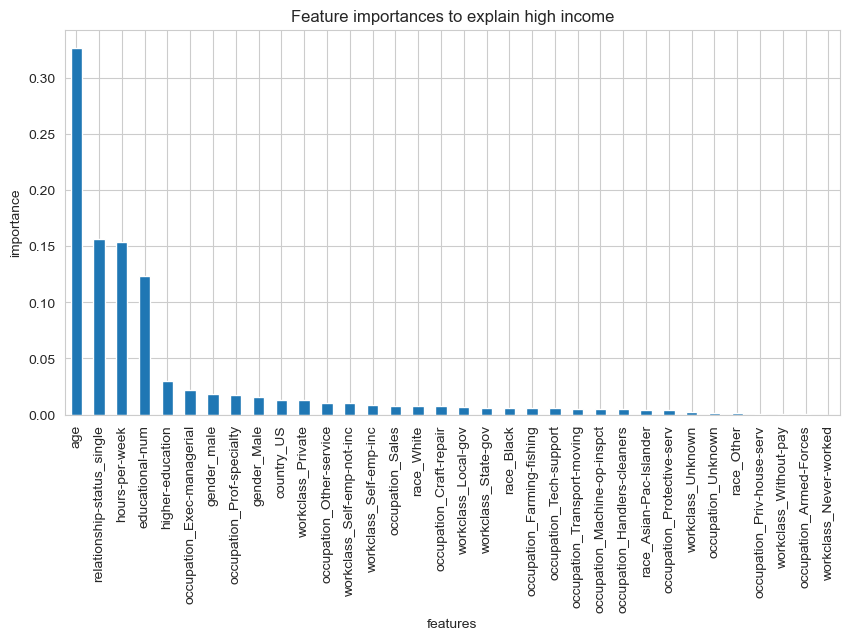

In [257]:
# Visualising features by importance
plt.subplots(figsize=(10, 5))
rf_feat_imps = pd.Series(importances, index=X.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importances to explain high income');